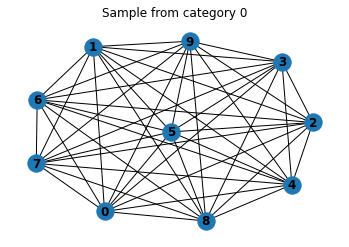

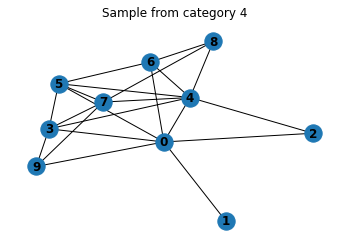

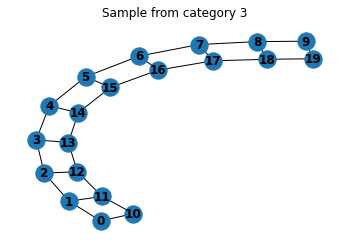

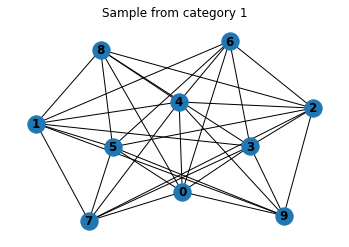

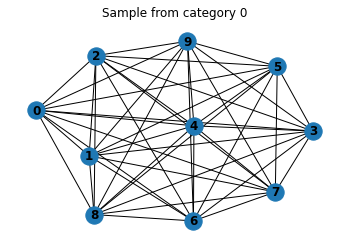

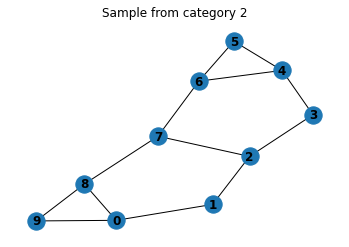

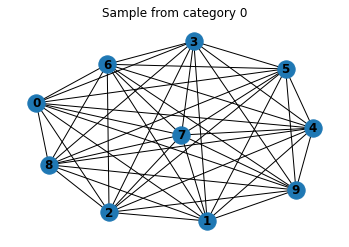

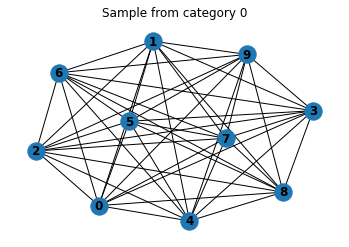

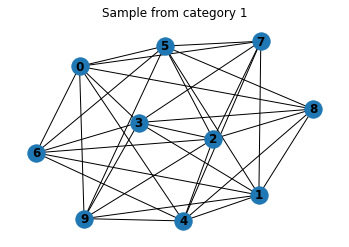

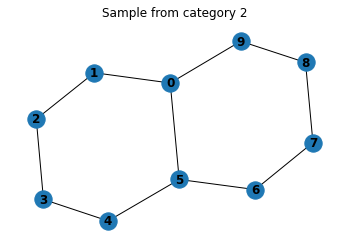

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy
# Total number of graphs you wish to generate
total_number_of_graphs = 100
# Number of nodes in the graph
number_of_nodes = 10
# Here are the categories of graph generators
types_of_graphs = [
    lambda n: nx.complete_graph(n),
    lambda n: nx.turan_graph(n,3),
    lambda n: nx.newman_watts_strogatz_graph(n,3,0.2),
    lambda n: nx.ladder_graph(n),
    lambda n: nx.barabasi_albert_graph(n,3)
]
# We will sample them with different weights.
# Clusters will have uneven size
weights = np.random.rand(len(types_of_graphs))
weights /= sum(weights)
# Now generate the graphs
graphs= []
true_labels = []
for graph_index in np.random.choice(range(len(types_of_graphs)),total_number_of_graphs,
    list(weights)):
    graphs.append(types_of_graphs[graph_index](number_of_nodes))
    true_labels.append(graph_index)
# We plot some of them here for reference. We'll cap it at 10
num_to_plot = min(len(graphs),10)
for index, G in enumerate(graphs[0:num_to_plot]):
    plt.figure()
    plt.title(f"Sample from category {true_labels[index]}")
    nx.draw(G, with_labels=True, font_weight='bold')

In [2]:
import networkx as nx
from os import listdir
from os.path import isfile, join
# Where have we stored the data?
data_path = "./example_dc_to_dc_graphs/"
# Get all of the circuit filesnames
circuitfiles = [f for f in listdir(data_path) if
isfile(join(data_path, f))]
# Now you can load a networkx graph of the circuit:
G = nx.read_gpickle(data_path + circuitfiles[0])

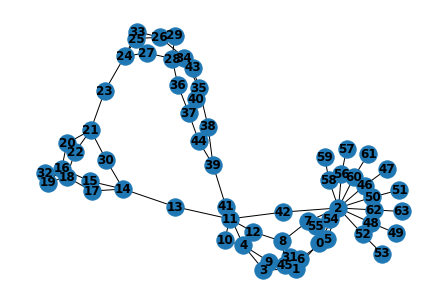

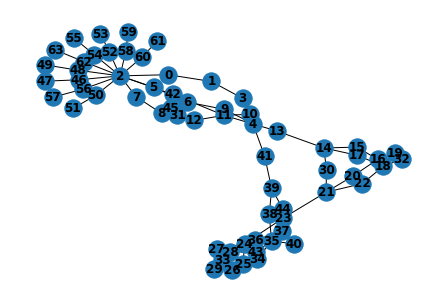

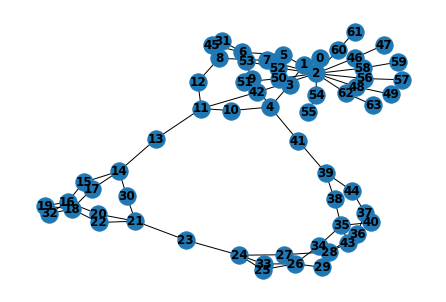

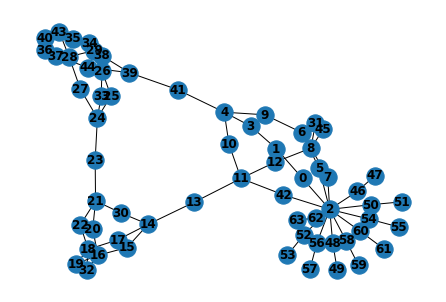

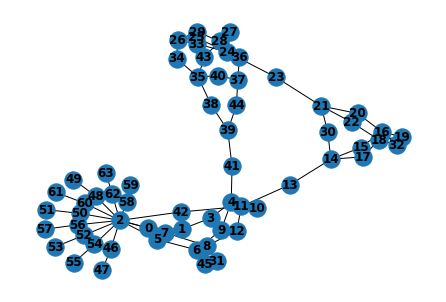

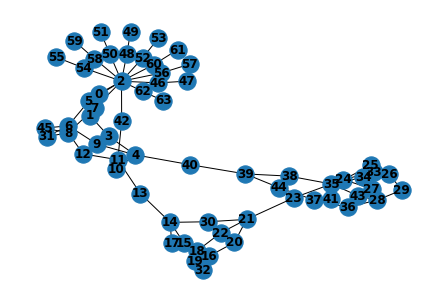

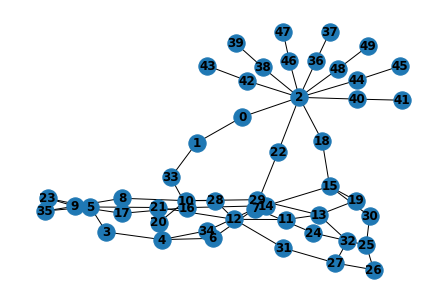

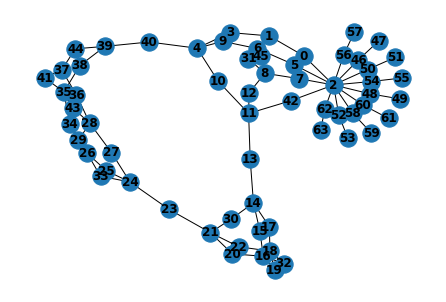

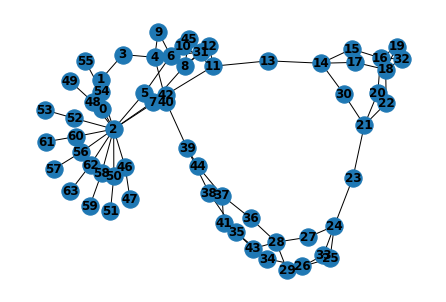

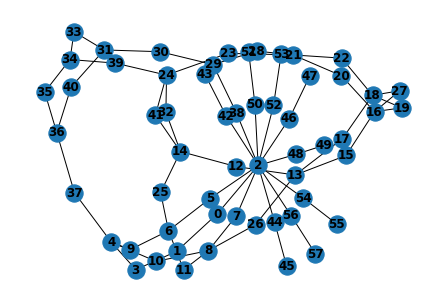

In [7]:
num_to_plot = min(len(circuitfiles),10)
for index, G_file in enumerate(circuitfiles[0:num_to_plot]):
    G = nx.read_gpickle(data_path + G_file)
    plt.figure()
    # plt.title(f"Sample from category {true_labels[index]}")
    nx.draw(G, with_labels=True, font_weight='bold')